<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
import warnings

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 148.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
df[['Employment', 'JobSat', 'RemoteWork']].dtypes
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull())
df['JobSat'].unique()
df['RemoteWork'].unique()

# Replace missing values in 'Employment' with the most frequent value
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)



# Replace missing values in 'RemoteWork' with the most frequent value
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
#check the data frame for any nan
display(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())



       Employment  JobSat  RemoteWork
0           False    True       False
1           False    True       False
2           False    True       False
3           False    True        True
4           False    True        True
...           ...     ...         ...
65432       False    True       False
65433       False    True       False
65434       False    True       False
65435       False    True       False
65436       False    True        True

[65437 rows x 3 columns]


Employment        0
JobSat        36311
RemoteWork        0
dtype: int64

In [5]:
display(df['JobSat'].isnull().sum())

np.int64(36311)

In [6]:
df.shape

(65437, 114)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


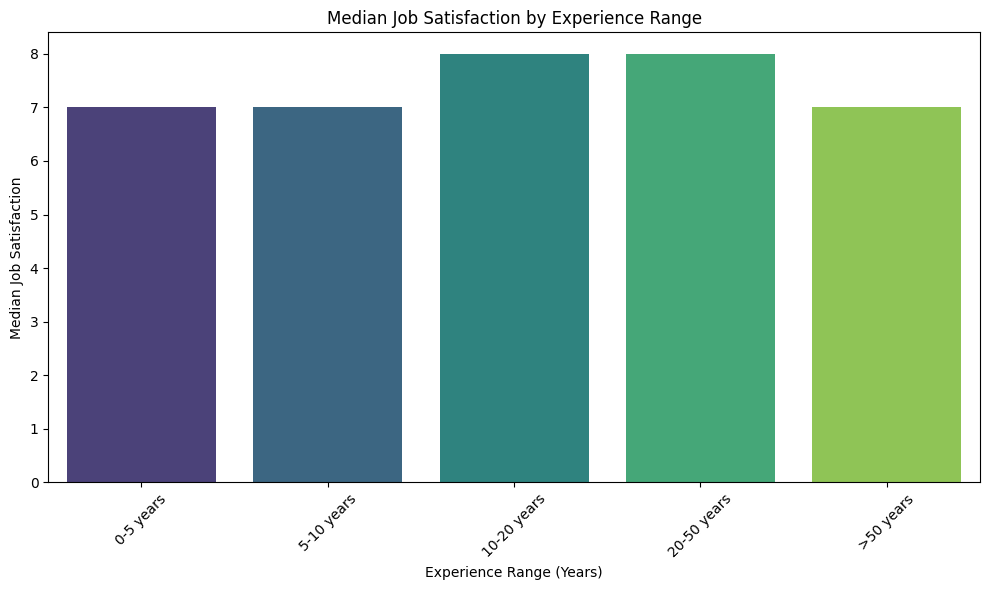

In [8]:

# Ensure 'JobSat' is numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Clean 'YearsCodePro' column and create experience ranges
def map_experience(years):
    if isinstance(years, str):
        if 'Less than 1 year' in years:
            return '0-5 years'
        elif 'More than 50 years' in years:
            return '>50 years'
        try:
            years = int(years)
        except ValueError:
            return np.nan  # Return NaN for unconvertible values
    if years < 1:
        return '0-5 years'
    elif years <= 5:
        return '0-5 years'
    elif years <= 10:
        return '5-10 years'
    elif years <= 20:
        return '10-20 years'
    elif years <= 50:
        return '20-50 years'
    else:
        return '>50 years'

# Apply mapping function to create experience range
df['ExperienceRange'] = df['YearsCodePro'].apply(map_experience)

# Group by experience range and calculate the median JobSat
experience_group = df.groupby('ExperienceRange', observed=True)['JobSat'].median().reset_index()

# Ensure logical order of experience ranges
experience_order = ['0-5 years', '5-10 years', '10-20 years', '20-50 years', '>50 years']
experience_group['ExperienceRange'] = pd.Categorical(experience_group['ExperienceRange'], categories=experience_order, ordered=True)
experience_group = experience_group.sort_values('ExperienceRange')

# Step 3: Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=experience_group, palette='viridis')

# Add labels and title
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


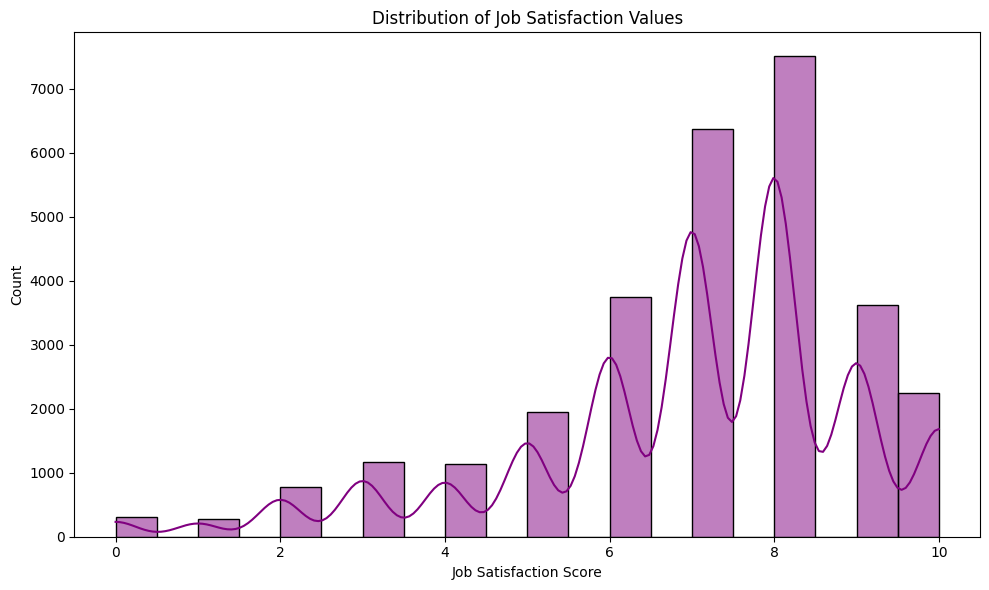

In [9]:
# Set the style for better visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['JobSat'].dropna(), bins=20, kde=True, color='purple')

# Add labels and title
plt.title('Distribution of Job Satisfaction Values')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


In [10]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)

Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


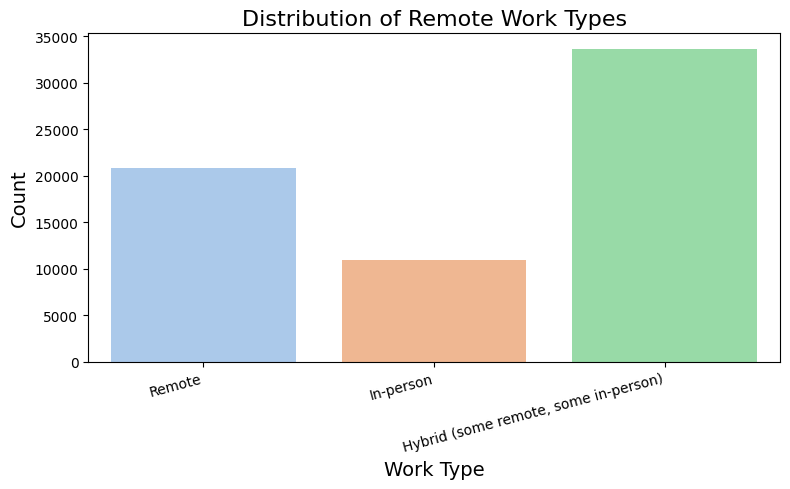

In [11]:
## Write your code here

# Count plot for RemoteWork distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    x='RemoteWork', 
    data=df, 
    palette='pastel', 
    order=['Remote', 'In-person', 'Hybrid (some remote, some in-person)']  # Specify order explicitly
)

# Add title and labels
plt.title('Distribution of Remote Work Types', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=15, ha='right')

# Show plot
plt.tight_layout()
plt.show()


RemoteWork                                                          Hybrid (some remote, some in-person)  \
EmploymentSimplified DevType                                                                               
Part-time            Academic researcher                                                        0.656704   
                     Blockchain                                                                 0.285106   
                     Cloud infrastructure engineer                                              0.473186   
                     Data engineer                                                              0.504472   
                     Data or business analyst                                                   0.529637   
                     Data scientist or machine learning specialist                              0.572266   
                     Database administrator                                                     0.456140   
                     Designer                                                                   0.554945   
                     DevOps specialist                                                          0.538763   
                     Developer Advocate                                                         0.333333   
                     Developer Experience                                                       0.464286   
                     Developer, AI                                                              0.491713   
                     Developer, QA or test                                                      0.447619   
                     Developer, back-end                                                        0.446313   
                     Developer, desktop or enterprise applications                              0.472122   
                     Developer, embedded applications or devices                                0.516328   
                     Developer, front-end                                                       0.449686   
                     Developer, full-stack                                                      0.447536   
                     Developer, game or graphics                                                0.502833   
                     Developer, mobile                                                          0.428996   
                     Educator                                                                   0.416901   
                     Engineer, site reliability                                                 0.448387   
                     Engineering manager                                                        0.495686   
                     Hardware Engineer                                                          0.515000   
                     Marketing or sales professional                                            0.447917   
                     Other (please specify):                                                    0.554923   
                     Product manager                                                            0.503448   
                     Project manager                                                            0.521531   
                     Research & Development role                                                0.524920   
                     Scientist                                                                  0.590361   
                     Security professional                                                      0.514045   
                     Senior Executive (C-Suite, VP, etc.)                                       0.462366   
                     Student                                                                    0.909251   
                     System administrator                                                       0.509058   

RemoteWork                                                          In-person  \
EmploymentSimplified DevType  

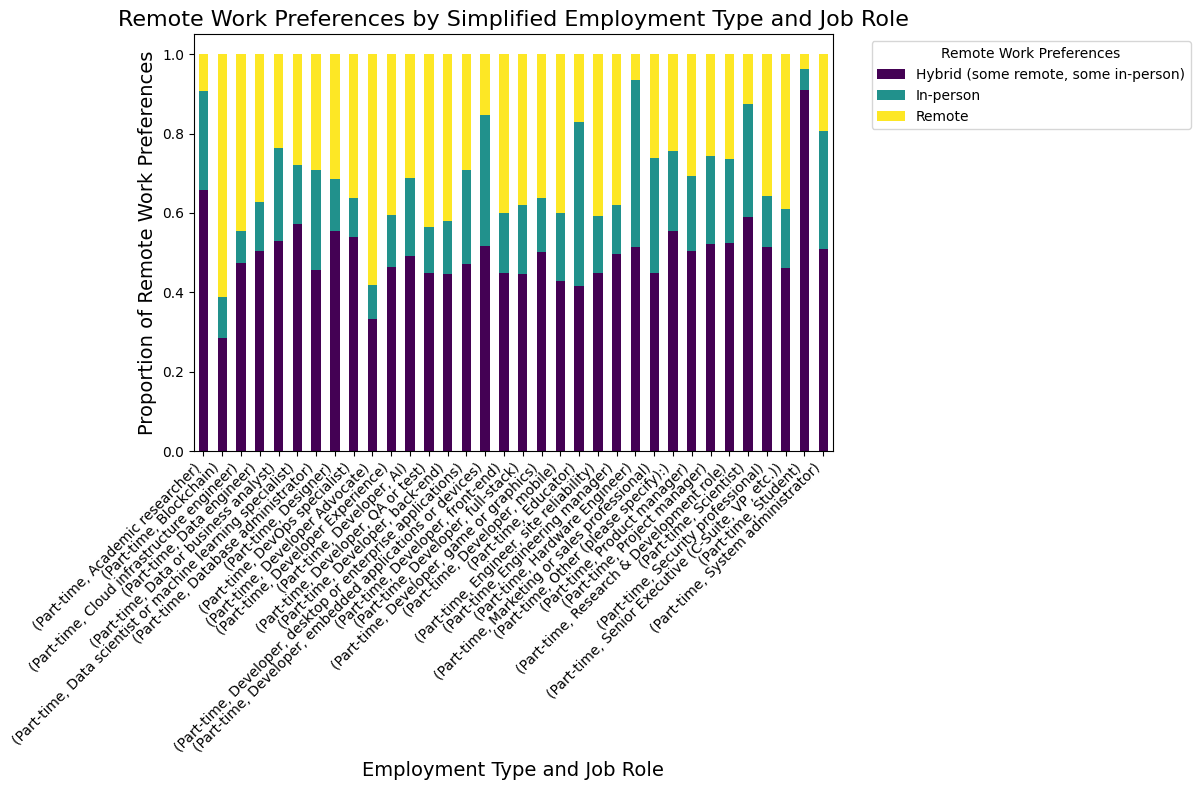

In [19]:


# Simplify the Employment column
df['EmploymentSimplified'] = df['Employment'].apply(
    lambda x: 'Full-time' if 'Full-time' in x else 'Part-time'
)

# Cross-tabulate RemoteWork by simplified EmploymentType and JobRole
remote_work_ct = pd.crosstab(
    [df['EmploymentSimplified'], df['DevType']],  # Row indices: Simplified Employment and Job role
    df['RemoteWork'],                             # Column: Remote work preferences
    normalize='index'                             # Optional: Normalize by row to get proportions
)

# Display the cross-tabulation table
display(remote_work_ct)

# Plot the cross-tabulation (stacked bar chart)
remote_work_ct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    colormap='viridis'
)

# Add labels and title
plt.title('Remote Work Preferences by Simplified Employment Type and Job Role', fontsize=16)
plt.xlabel('Employment Type and Job Role', fontsize=14)
plt.ylabel('Proportion of Remote Work Preferences', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Preferences', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [13]:
df['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'],
      shape=(23865,), dtype=object)

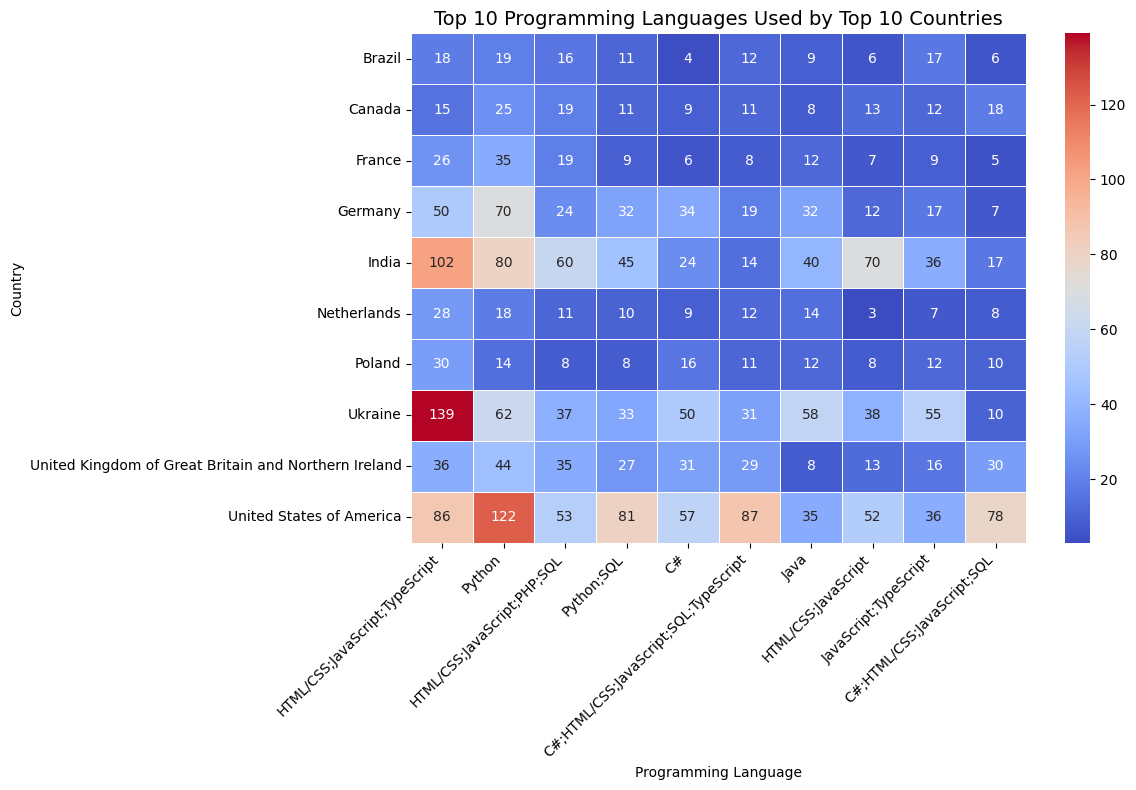

In [14]:

# Step 1: Ensure LanguageHaveWorkedWith is split into multiple rows
df_copy = df.copy()
df_copy['LanguageHaveWorkedWith'] = df_copy['LanguageHaveWorkedWith'].str.split(',')
df_exploded = df_copy.explode('LanguageHaveWorkedWith')

# Step 2: Limit to Top 10 Countries with Most Respondents
top_countries = df_exploded['Country'].value_counts().head(10).index
df_filtered = df_exploded[df_exploded['Country'].isin(top_countries)]

# Step 3: Create a pivot table counting languages per country
heatmap_data = df_filtered.pivot_table(index='Country', 
                                       columns='LanguageHaveWorkedWith', 
                                       aggfunc='size', 
                                       fill_value=0)

# Step 4: Limit to Top 10 Most Used Languages
top_languages = heatmap_data.sum().sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data[top_languages]

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size to fit labels better
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, annot=True, fmt="d")

# Step 6: Customize labels and title
plt.title('Top 10 Programming Languages Used by Top 10 Countries', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Country')

# Rotate labels properly
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Fix layout
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust margins

# Show the heatmap
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


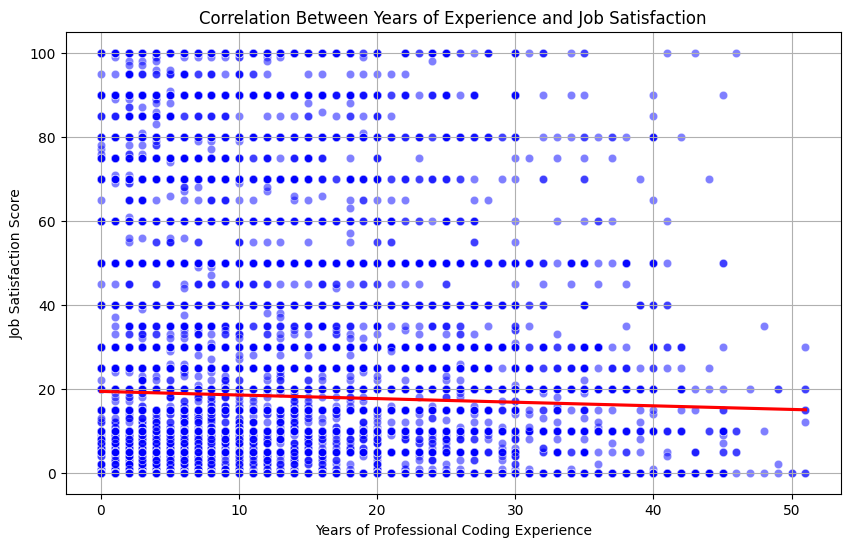

In [15]:

# Step 1: Convert YearsCodePro to numeric values
df_copy = df.copy()
df_copy['YearsCodePro'] = df_copy['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_copy['YearsCodePro'] = pd.to_numeric(df_copy['YearsCodePro'], errors='coerce')  # Convert to float

# Step 2: Convert JobSatPoints_1 to numeric
df_copy['JobSatPoints_1'] = pd.to_numeric(df_copy['JobSatPoints_1'], errors='coerce')

# Step 3: Drop NaN values (for better visualization)
df_cleaned = df_copy.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Step 4: Create Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['YearsCodePro'], y=df_cleaned['JobSatPoints_1'], alpha=0.5, color='blue')

# Step 5: Add Regression Line for Trend
sns.regplot(x=df_cleaned['YearsCodePro'], y=df_cleaned['JobSatPoints_1'], scatter=False, color='red', ci=None)

# Step 6: Customize Labels and Title
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)

# Show the Plot
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [35]:
## Write your code here
# Drop rows where EdLevel is missing
df = df.dropna(subset=['EdLevel'])

# Define a function to categorize employment types into four groups
def simplify_employment(emp):
    emp = str(emp).lower()  # Convert to lowercase to ensure case insensitivity
    
    if 'full-time' in emp:
        return 'Full-time'
    elif 'part-time' in emp:
        return 'Part-time'
    elif 'retired' in emp:
        return 'Retired'
    elif 'not employed' in emp or 'unemployed' in emp:
        return 'Not employed'
    else:
        return 'Other'  # Optional: Categorize everything else separately

# Apply the function to create a new column
df['EmploymentSimplified'] = df['Employment'].apply(simplify_employment)





# Step 1: Cross-tabulation to get the proportion of employment types by education level
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['EmploymentSimplified'], normalize='index')

# Step 2: Plot the stacked bar chart using the crosstab data
education_employment_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

# Add labels and title
plt.title('Distribution of Employment Type Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
 Adjust the y-axis scale for better visibility
plt.ylim(0, employment_counts.max() * 1.2)  # Increases height by 20% for clarity


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()





IndentationError: unexpected indent (2806442673.py, line 38)

In [32]:
df['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

/tmp/ipykernel_133/2740171277.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

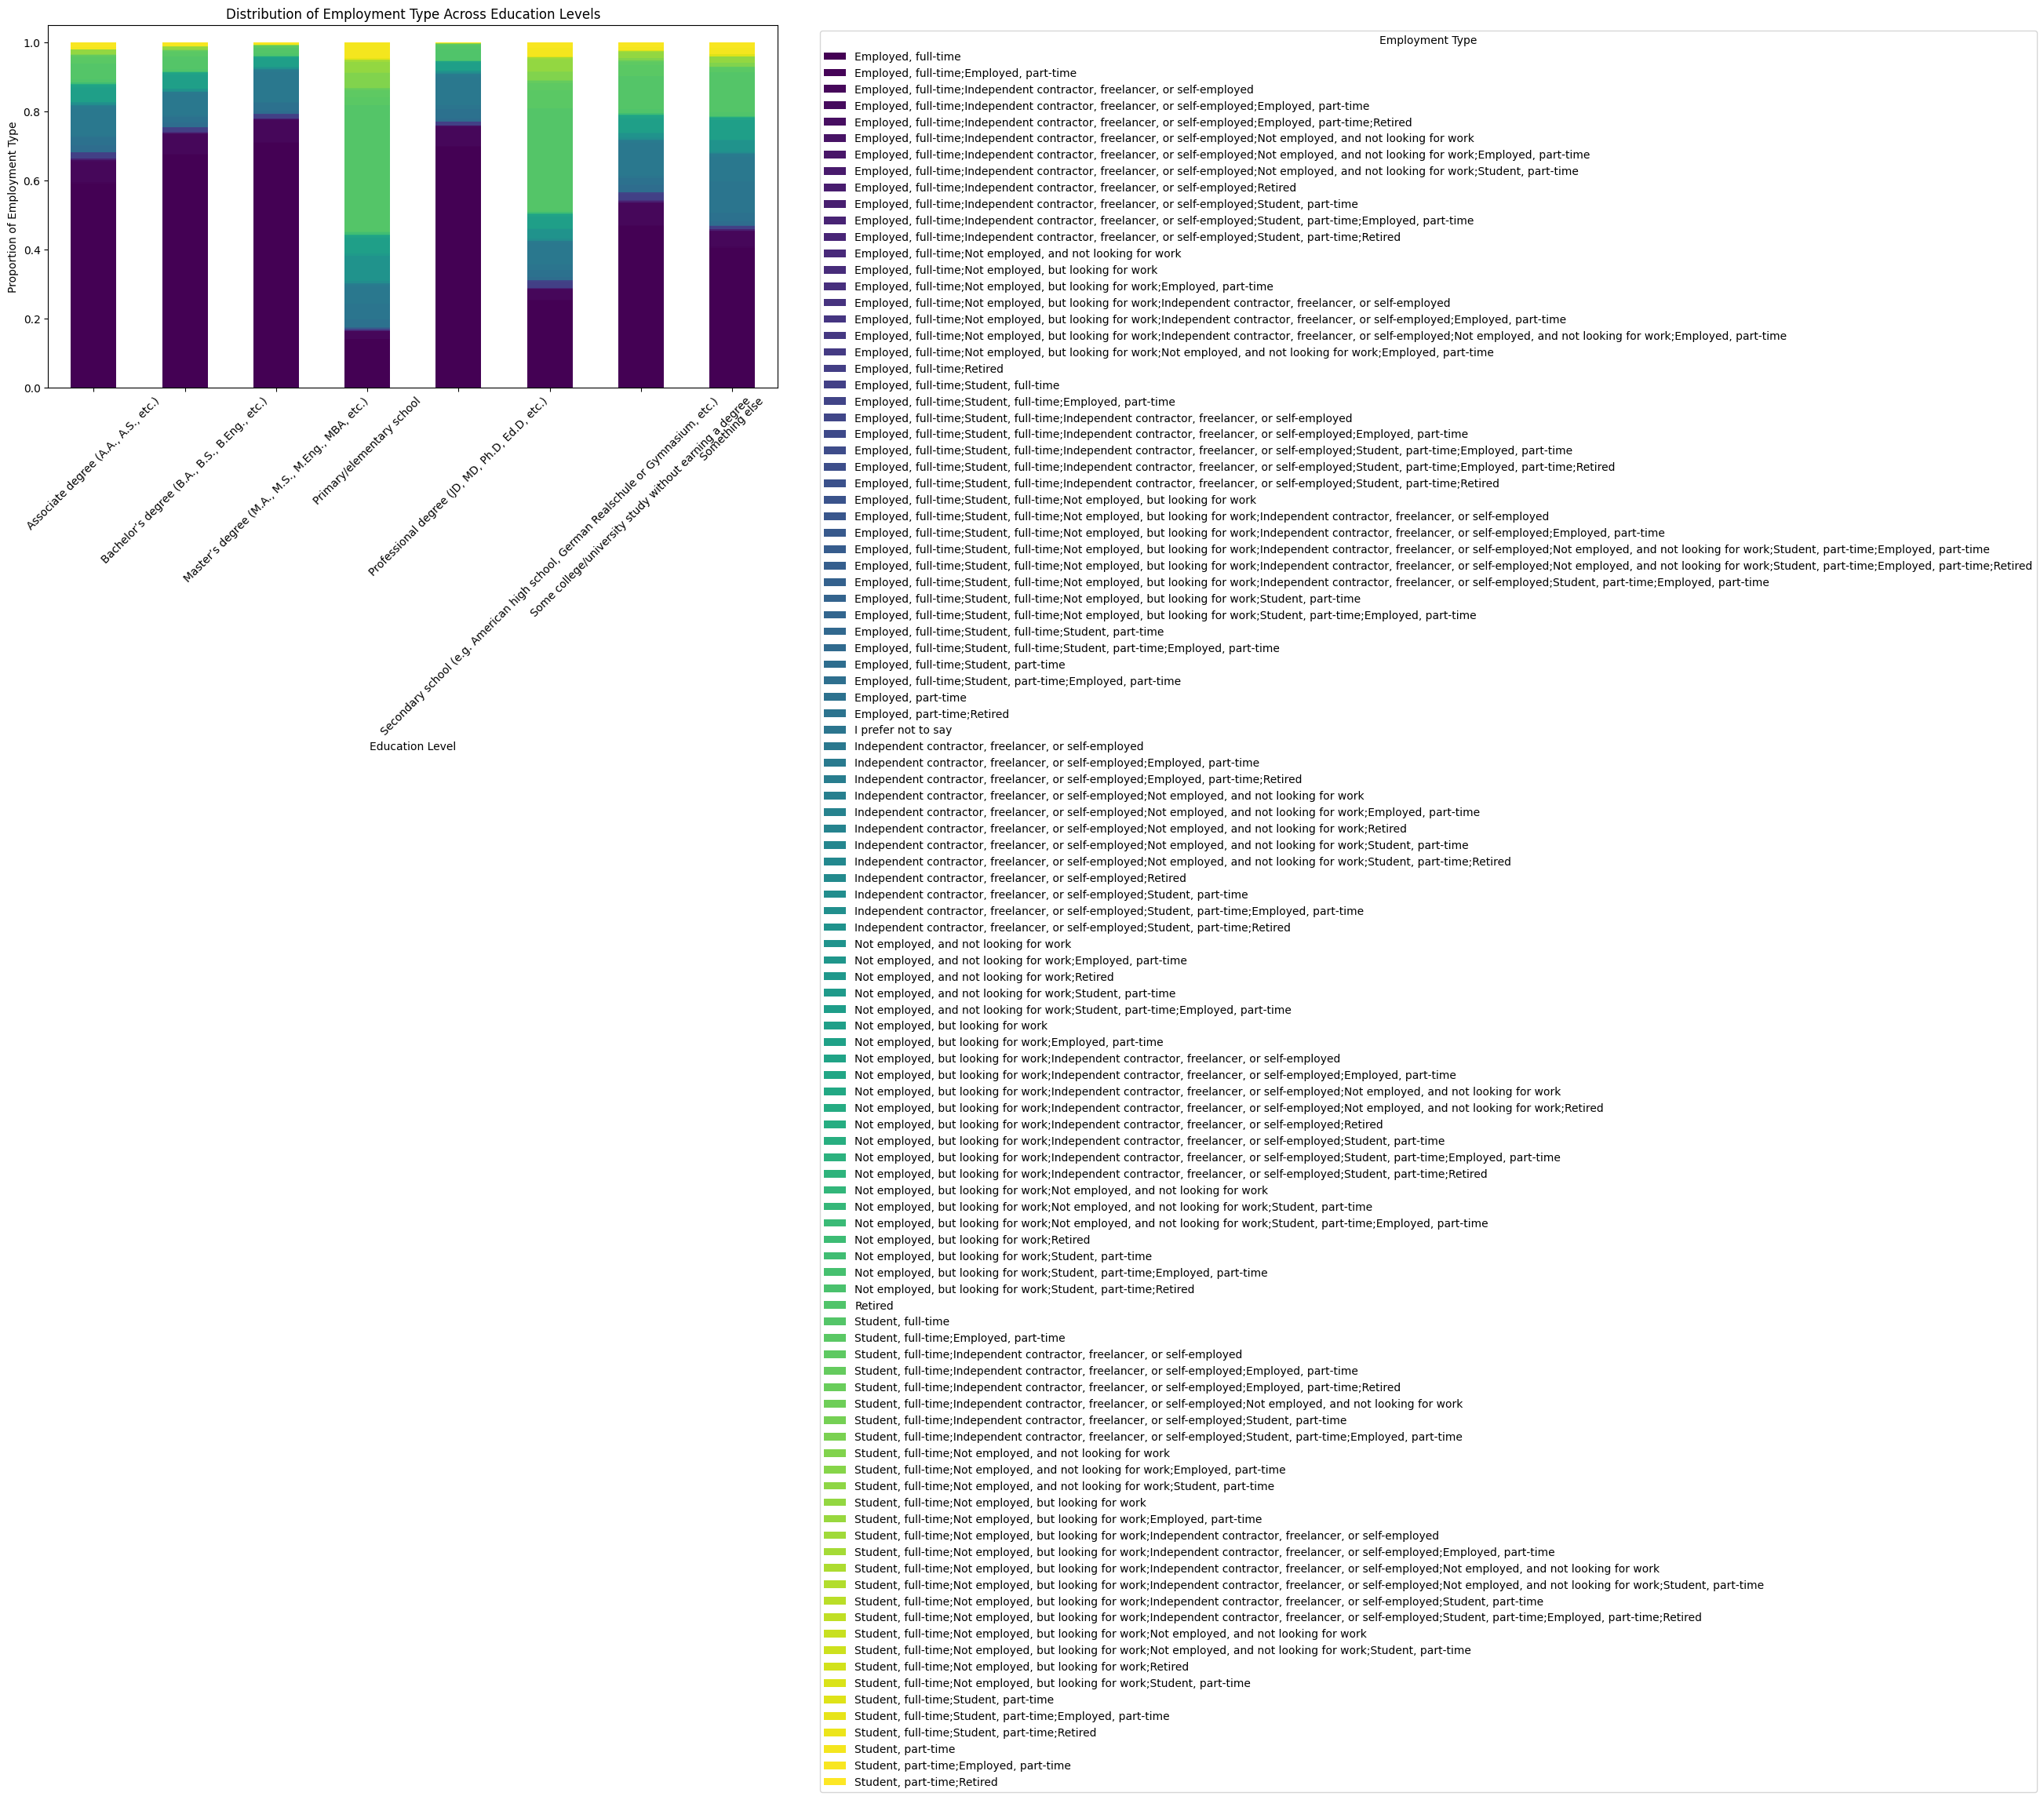

In [31]:
df.dropna(subset=['EdLevel'])
# Define a function to categorize employment types into four groups
def simplify_employment(emp):
    emp = str(emp).lower()  # Convert to lowercase to ensure case insensitivity
    
    if 'full-time' in emp:
        return 'Full-time'
    elif 'part-time' in emp:
        return 'Part-time'
    elif 'retired' in emp:
        return 'Retired'
    elif 'not employed' in emp or 'unemployed' in emp:
        return 'Not employed'
    else:
        return 'Other'  # Optional: Categorize everything else separately

# Apply the function to create a new column
df['EmploymentSimplified'] = df['Employment'].apply(simplify_employment)

# Verify the distribution
print(df['EmploymentSimplified'].value_counts())

# Group by EdLevel and Employment, then normalize to get proportions
education_employment_dist = df.groupby('EdLevel')['Employmentimplified'].value_counts(normalize=True).unstack()

# Plot the bar chart
plt.figure(figsize=(12, 6))
education_employment_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

# Add labels and title
plt.title('Distribution of Employment Type Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('cleaned_data.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
